In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop('customerID' , axis = 'columns' , inplace =True)

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [10]:
#pd.to_numeric(df.TotalCharges)

In [11]:
pd.to_numeric(df.TotalCharges , errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
pd.to_numeric(df.TotalCharges , errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
df[pd.to_numeric(df.TotalCharges , errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df.shape

(7043, 20)

In [15]:
df.iloc[488]['TotalCharges']

' '

In [16]:
df1 = df[df.TotalCharges!=' ']

In [17]:
df1.shape

(7032, 20)

In [18]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [20]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [21]:
df1.TotalCharges.dtypes

dtype('float64')

In [22]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [23]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

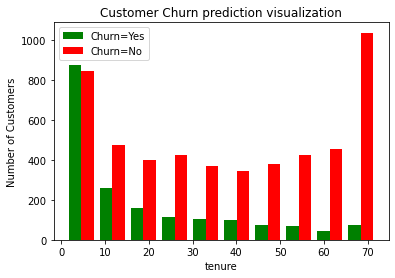

In [24]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')

plt.hist([tenure_churn_yes,tenure_churn_no], color =['g' , 'r'] , label =['Churn=Yes','Churn=No'])
plt.legend()

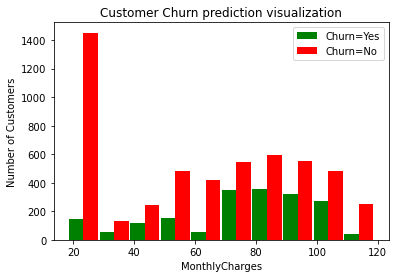

In [25]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')

blood_sugar_men = [113 , 85,90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67 , 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]


plt.hist([mc_churn_yes,mc_churn_no], rwidth = 0.95 , color =['g' , 'r'] , label =['Churn=Yes','Churn=No'])
plt.legend()

In [26]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [27]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')
            

In [28]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [29]:
df1.replace('No internet service' , 'No' ,inplace= True)
df1.replace('No phone service' , 'No' ,inplace= True)

In [30]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [31]:
yes_no_columns = ['Partner' ,'Dependents','PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup' ,
                  'DeviceProtection' ,'TechSupport',
                 'StreamingTV' , 'StreamingMovies' ,'PaperlessBilling' ,'Churn']

In [32]:
for col in yes_no_columns:
    df1[col].replace({'Yes': 1 , 'No' : 0},inplace=True)

In [33]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [34]:
df1['gender'].replace({'Female':1 , 'Male':0} ,inplace=True)

In [35]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [36]:
df2 = pd.get_dummies(data=df1,columns=['InternetService' , 'Contract' ,'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [37]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5385,0,0,0,0,53,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1613,0,0,0,0,34,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
668,1,0,0,0,4,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1760,0,0,1,1,50,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0


In [38]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [42]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [43]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3249,1,0,1,1,0.126761,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
6417,1,1,1,0,0.704225,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4798,1,1,0,0,0.492958,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3599,1,0,1,1,0.619718,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1489,1,0,1,1,0.309859,1,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1


In [44]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [45]:
x = df2.drop('Churn' ,axis ='columns')
y = df2['Churn']

In [46]:
from sklearn.model_selection import train_test_split

In [72]:
x_train , x_test , y_train, y_test = train_test_split(x, y , test_size = 0.33 ,random_state = 42)

In [73]:
x_train.shape

(4711, 26)

In [74]:
x_test.shape

(2321, 26)

In [75]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5767,1,0,1,0,0.901408,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5361,1,0,0,1,0.042254,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5745,1,0,1,1,0.845070,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6065,0,0,0,0,0.816901,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
229,1,0,1,1,0.647887,1,1,1,1,0,...,1,0,0,0,0,1,0,1,0,0
3657,1,0,1,1,0.507042,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5429,1,0,1,1,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
4874,1,0,0,0,0.521127,1,0,1,1,1,...,0,1,0,1,0,0,0,1,0,0
5940,0,0,1,1,0.774648,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4519,1,0,1,0,0.788732,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [76]:
len(x_train.columns)

26

In [77]:
import tensorflow as tf
from tensorflow import keras

In [78]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(1,  activation = 'sigmoid'),
])

In [79]:
model.compile(optimizer='adam' ,loss ='binary_crossentropy',metrics =['accuracy'])

In [80]:
model.fit(x_train , y_train, epochs =100)

Epoch 1/100
148/148 [==============================] - 0s 762us/step - loss: 0.5560 - accuracy: 0.7047
Epoch 2/100
148/148 [==============================] - 0s 687us/step - loss: 0.4513 - accuracy: 0.7778
Epoch 3/100
148/148 [==============================] - 0s 782us/step - loss: 0.4294 - accuracy: 0.7903
Epoch 4/100
148/148 [==============================] - 0s 762us/step - loss: 0.4248 - accuracy: 0.7947
Epoch 5/100
148/148 [==============================] - 0s 844us/step - loss: 0.4201 - accuracy: 0.7988
Epoch 6/100
148/148 [==============================] - 0s 735us/step - loss: 0.4190 - accuracy: 0.7992
Epoch 7/100
148/148 [==============================] - 0s 801us/step - loss: 0.4177 - accuracy: 0.8003
Epoch 8/100
148/148 [==============================] - 0s 721us/step - loss: 0.4166 - accuracy: 0.8022
Epoch 9/100
148/148 [==============================] - 0s 741us/step - loss: 0.4152 - accuracy: 0.8030
Epoch 10/100
148/148 [==============================] - 0s 748us/step - l

In [81]:
model.evaluate(x_test, y_test)

73/73 [==============================] - 0s 770us/step - loss: 0.4432 - accuracy: 0.7962


[0.44315284490585327, 0.7962085604667664]

In [82]:
yp = model.predict(x_train)

In [83]:
yp[:5]

array([[0.01726115],
       [0.05229366],
       [0.00415596],
       [0.00193387],
       [0.0273079 ]], dtype=float32)

In [84]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [85]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [86]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [87]:
from sklearn.metrics import confusion_matrix , classification_report

In [88]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

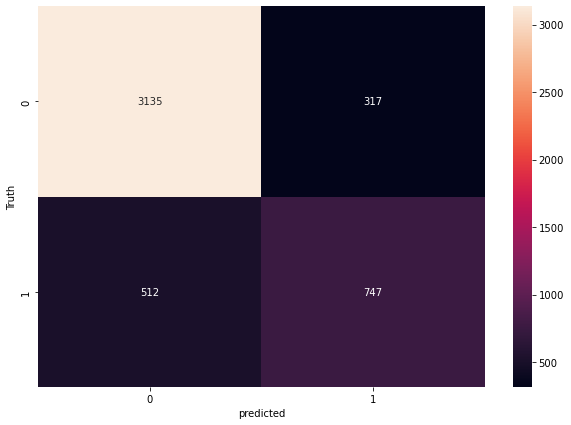

In [89]:
cm = tf.math.confusion_matrix(labels = y_train,predictions=y_pred)

plt.figure(figsize =(10,7))
sn.heatmap(cm, annot = True ,fmt ='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [91]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3452
           1       0.70      0.59      0.64      1259

    accuracy                           0.82      4711
   macro avg       0.78      0.75      0.76      4711
weighted avg       0.82      0.82      0.82      4711

